Dokonczyc RNN
UNET testowac na innych zbiorach
Transformer
Podstawowe eksperymenty z RSA
Runtime - jak rozwiazac to zagadnienie???
Zestawienie porównania wyników modeli
Latex - zacząć pisać od końca
1. Przeglad aktualnych rozwiazan
2. Implementacja
3. Rezultaty

# RNN for R-peak detection using the pytorch library

In [1]:
import os
import numpy as np
import neurokit2 as nk
import torch
import matplotlib.pyplot as plt
from customLib.vis import *
from customLib.preprocess import *
from customLib.peak_detection import *
from customLib.load_physionet_ecgs import load_physionet_ecgs
from customLib.dataset import read_dataset, split_dataset
from customLib.config import apnea_ecg_path, mitbih_path
from models.models import LSTM

In [2]:
LSTM_HIDDEN_SIZE = 32
EPOCHS = 20
BATCH_SIZE = 50
LR = 1e-2

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print('Training will be performed with:',device)

Training will be performed with: cuda:0


In [ ]:
# laod and preprocess MITBIH or Apnea dataset
x, y = load_physionet_ecgs(path=mitbih_path, annotation_file_extension="atr" , force_new=True, window_in_seconds=10, expand=False, denoise=True)

In [3]:
path = mitbih_path + "\\dataset\\expanded_labels\\downsampled"
# x_train, y_train, x_test, y_test, x_val, y_val = split_dataset(path=mitbih_path, x=x, y=y, shuffle=False, split_ratio=0.8, is_validation_set=True)
x_train, y_train, x_test, y_test, x_val, y_val = read_dataset(path=path, is_validation_set=True)

x_train = np.expand_dims(x_train, 2)[:3000]
y_train = np.expand_dims(y_train, 2)[:3000]

x_test = np.expand_dims(x_test, 2)[:1000]
y_test = np.expand_dims(y_test, 2)[:1000]

x_val = np.expand_dims(x_val, 2)[:500]
y_val = np.expand_dims(y_val, 2)[:500]

In [4]:
num_pos = np.sum(y_train[0])
num_neg = len(y_train[0]) - num_pos
pos_weight = torch.tensor([num_neg / num_pos], dtype=torch.float32).to(device)
print(f"Positive label weight (R-peak): {pos_weight.item():.5f}")

Positive label weight (R-peak): 33.48276


In [5]:
model = LSTM(input_dim=1, hidden_size=LSTM_HIDDEN_SIZE, lr=LR) #input_size == hidden features size (1-lead ECG)

Training will be performed with: cuda:0


e:\anaconda3\envs\torch\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.3 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


====Epoch [1/20]====


 93%|█████████▎| 56/60 [00:01<00:00, 38.27it/s]

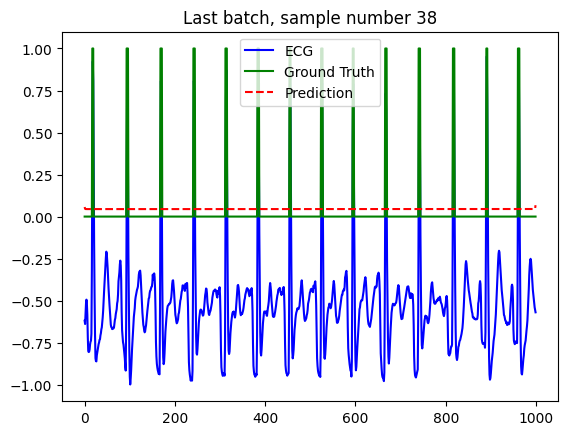

100%|██████████| 60/60 [00:01<00:00, 30.99it/s]



Train Loss: 0.2077
Train Weighted Accuracy: 0.49965
Train F1 Score: 0.02323
Train TPR: 0.01600
Train FPR: 0.01670
Train TNR: 0.98330
Train FNR: 0.98400



100%|██████████| 10/10 [00:00<00:00, 24.15it/s]



Validation Loss: 0.1778
Validation Weighted Accuracy: 0.50000
Validation F1 Score: 0.00000
Validation TPR: 0.00000
Validation FPR: 0.00000
Validation TNR: 1.00000
Validation FNR: 1.00000

====Epoch [2/20]====


 93%|█████████▎| 56/60 [00:01<00:00, 34.64it/s]

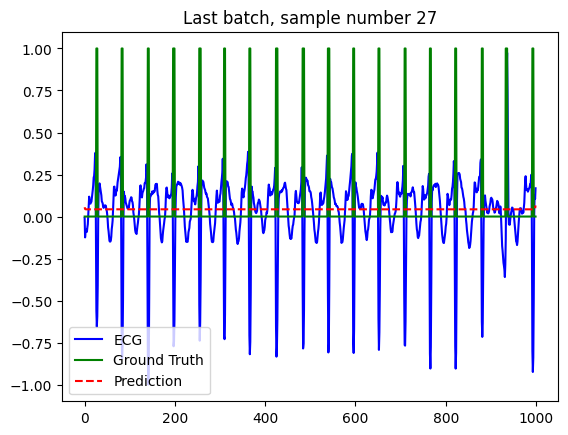

100%|██████████| 60/60 [00:02<00:00, 26.07it/s]



Train Loss: 0.1810
Train Weighted Accuracy: 0.50000
Train F1 Score: 0.00000
Train TPR: 0.00000
Train FPR: 0.00000
Train TNR: 1.00000
Train FNR: 1.00000



100%|██████████| 10/10 [00:00<00:00, 30.06it/s]



Validation Loss: 0.1778
Validation Weighted Accuracy: 0.50000
Validation F1 Score: 0.00000
Validation TPR: 0.00000
Validation FPR: 0.00000
Validation TNR: 1.00000
Validation FNR: 1.00000

====Epoch [3/20]====


 97%|█████████▋| 58/60 [00:01<00:00, 40.37it/s]

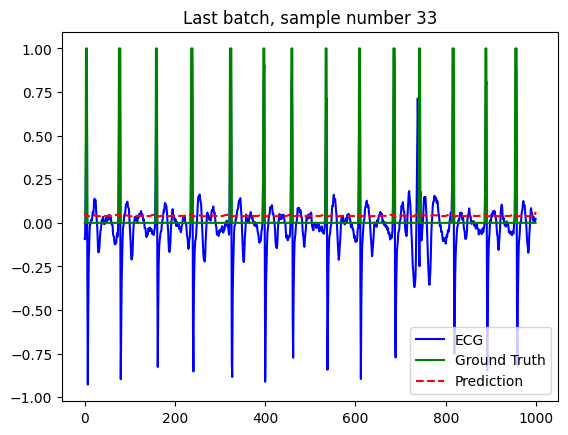

100%|██████████| 60/60 [00:01<00:00, 32.34it/s]



Train Loss: 0.1804
Train Weighted Accuracy: 0.50000
Train F1 Score: 0.00000
Train TPR: 0.00000
Train FPR: 0.00000
Train TNR: 1.00000
Train FNR: 1.00000



100%|██████████| 10/10 [00:00<00:00, 27.17it/s]



Validation Loss: 0.1746
Validation Weighted Accuracy: 0.50000
Validation F1 Score: 0.00000
Validation TPR: 0.00000
Validation FPR: 0.00000
Validation TNR: 1.00000
Validation FNR: 1.00000

====Epoch [4/20]====


 98%|█████████▊| 59/60 [00:02<00:00, 27.61it/s]

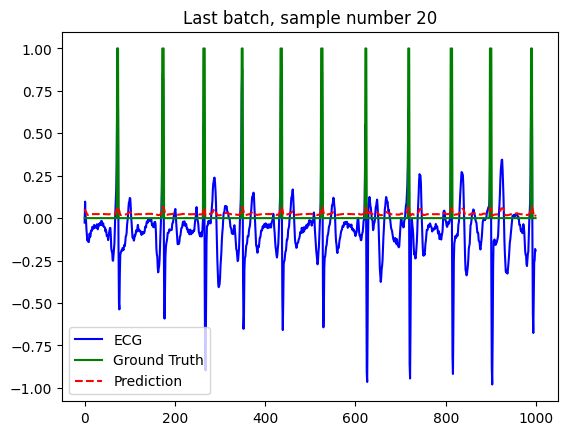

100%|██████████| 60/60 [00:02<00:00, 23.19it/s]



Train Loss: 0.1727
Train Weighted Accuracy: 0.50000
Train F1 Score: 0.00000
Train TPR: 0.00000
Train FPR: 0.00000
Train TNR: 1.00000
Train FNR: 1.00000



100%|██████████| 10/10 [00:00<00:00, 24.51it/s]



Validation Loss: 0.1655
Validation Weighted Accuracy: 0.50000
Validation F1 Score: 0.00000
Validation TPR: 0.00000
Validation FPR: 0.00000
Validation TNR: 1.00000
Validation FNR: 1.00000

====Epoch [5/20]====


 95%|█████████▌| 57/60 [00:02<00:00, 28.86it/s]

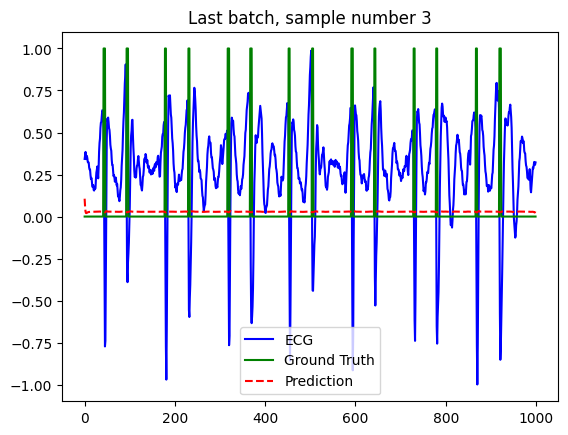

100%|██████████| 60/60 [00:02<00:00, 23.73it/s]



Train Loss: 0.1533
Train Weighted Accuracy: 0.51223
Train F1 Score: 0.04784
Train TPR: 0.02457
Train FPR: 0.00011
Train TNR: 0.99989
Train FNR: 0.97543



100%|██████████| 10/10 [00:00<00:00, 28.67it/s]



Validation Loss: 0.1394
Validation Weighted Accuracy: 0.65558
Validation F1 Score: 0.44450
Validation TPR: 0.31591
Validation FPR: 0.00476
Validation TNR: 0.99524
Validation FNR: 0.68409

====Epoch [6/20]====


 98%|█████████▊| 59/60 [00:02<00:00, 27.59it/s]

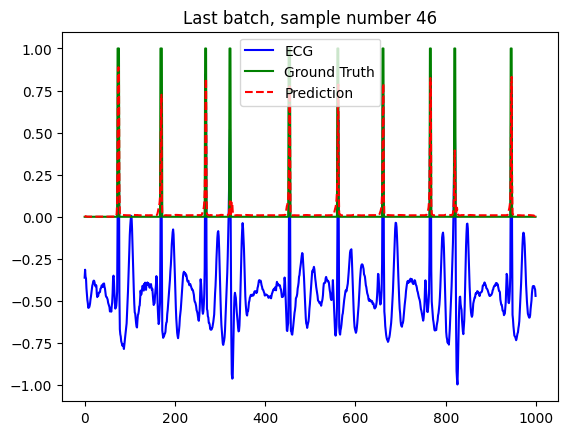

100%|██████████| 60/60 [00:02<00:00, 23.21it/s]



Train Loss: 0.1104
Train Weighted Accuracy: 0.67945
Train F1 Score: 0.49081
Train TPR: 0.36447
Train FPR: 0.00558
Train TNR: 0.99442
Train FNR: 0.63553



100%|██████████| 10/10 [00:00<00:00, 28.87it/s]



Validation Loss: 0.0772
Validation Weighted Accuracy: 0.73552
Validation F1 Score: 0.57330
Validation TPR: 0.47978
Validation FPR: 0.00874
Validation TNR: 0.99126
Validation FNR: 0.52022

====Epoch [7/20]====


 97%|█████████▋| 58/60 [00:02<00:00, 29.17it/s]

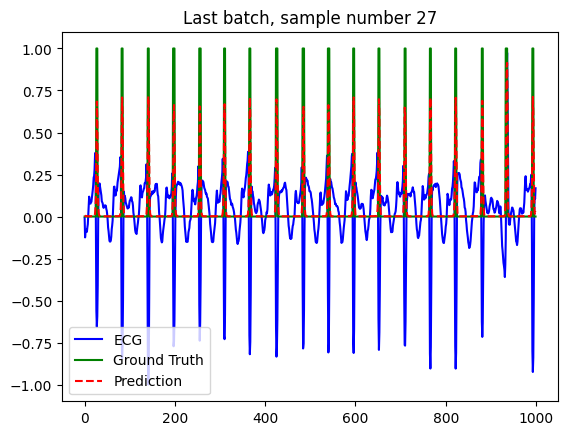

100%|██████████| 60/60 [00:02<00:00, 24.13it/s]



Train Loss: 0.0631
Train Weighted Accuracy: 0.81193
Train F1 Score: 0.69072
Train TPR: 0.63310
Train FPR: 0.00924
Train TNR: 0.99076
Train FNR: 0.36690



100%|██████████| 10/10 [00:00<00:00, 22.73it/s]



Validation Loss: 0.0552
Validation Weighted Accuracy: 0.84452
Validation F1 Score: 0.71993
Validation TPR: 0.70008
Validation FPR: 0.01103
Validation TNR: 0.98897
Validation FNR: 0.29992

====Epoch [8/20]====


 97%|█████████▋| 58/60 [00:02<00:00, 28.58it/s]

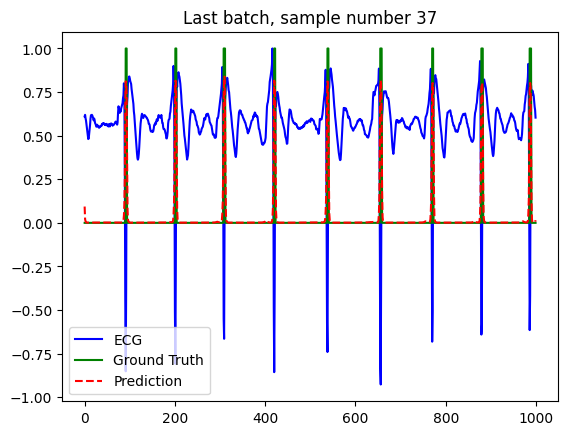

100%|██████████| 60/60 [00:02<00:00, 24.21it/s]



Train Loss: 0.0540
Train Weighted Accuracy: 0.84750
Train F1 Score: 0.73549
Train TPR: 0.70477
Train FPR: 0.00978
Train TNR: 0.99022
Train FNR: 0.29523



100%|██████████| 10/10 [00:00<00:00, 27.89it/s]



Validation Loss: 0.0510
Validation Weighted Accuracy: 0.86605
Validation F1 Score: 0.74245
Validation TPR: 0.74381
Validation FPR: 0.01171
Validation TNR: 0.98829
Validation FNR: 0.25619

====Epoch [9/20]====


 95%|█████████▌| 57/60 [00:02<00:00, 29.36it/s]

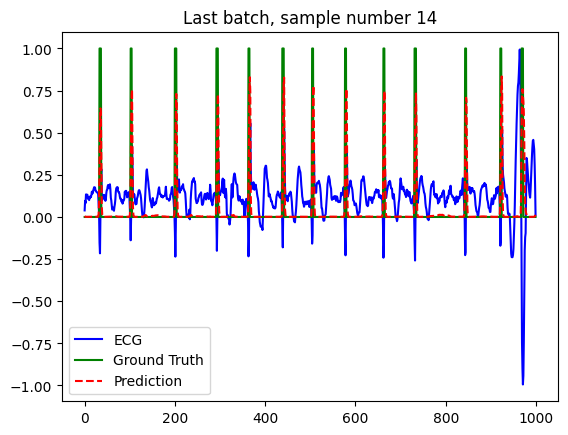

100%|██████████| 60/60 [00:02<00:00, 25.06it/s]



Train Loss: 0.0494
Train Weighted Accuracy: 0.86173
Train F1 Score: 0.75538
Train TPR: 0.73307
Train FPR: 0.00960
Train TNR: 0.99040
Train FNR: 0.26693



100%|██████████| 10/10 [00:00<00:00, 34.24it/s]



Validation Loss: 0.0485
Validation Weighted Accuracy: 0.87835
Validation F1 Score: 0.75927
Validation TPR: 0.76820
Validation FPR: 0.01151
Validation TNR: 0.98849
Validation FNR: 0.23180

====Epoch [10/20]====


 95%|█████████▌| 57/60 [00:02<00:00, 29.23it/s]

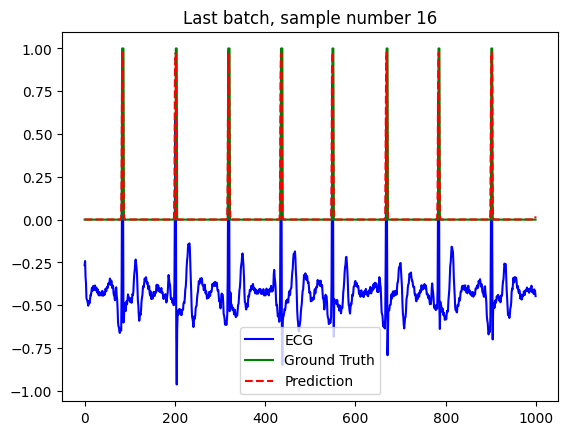

100%|██████████| 60/60 [00:02<00:00, 23.67it/s]



Train Loss: 0.0469
Train Weighted Accuracy: 0.87193
Train F1 Score: 0.77010
Train TPR: 0.75324
Train FPR: 0.00938
Train TNR: 0.99062
Train FNR: 0.24676



100%|██████████| 10/10 [00:00<00:00, 34.60it/s]



Validation Loss: 0.0464
Validation Weighted Accuracy: 0.89103
Validation F1 Score: 0.77582
Validation TPR: 0.79342
Validation FPR: 0.01136
Validation TNR: 0.98864
Validation FNR: 0.20658

====Epoch [11/20]====


 95%|█████████▌| 57/60 [00:02<00:00, 29.25it/s]

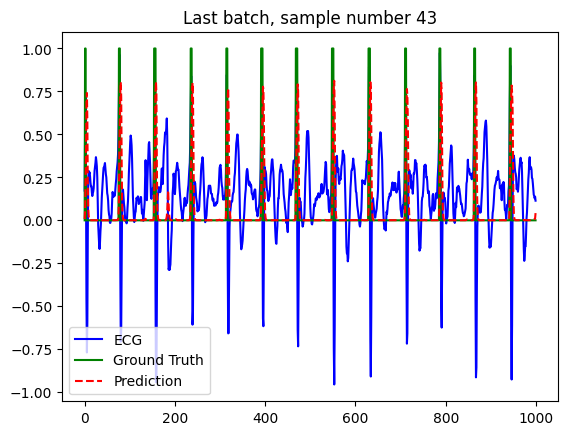

100%|██████████| 60/60 [00:02<00:00, 25.84it/s]



Train Loss: 0.0448
Train Weighted Accuracy: 0.88094
Train F1 Score: 0.78558
Train TPR: 0.77072
Train FPR: 0.00885
Train TNR: 0.99115
Train FNR: 0.22928



100%|██████████| 10/10 [00:00<00:00, 32.34it/s]



Validation Loss: 0.0440
Validation Weighted Accuracy: 0.89470
Validation F1 Score: 0.78834
Validation TPR: 0.79973
Validation FPR: 0.01033
Validation TNR: 0.98967
Validation FNR: 0.20027

====Epoch [12/20]====


 93%|█████████▎| 56/60 [00:02<00:00, 29.13it/s]

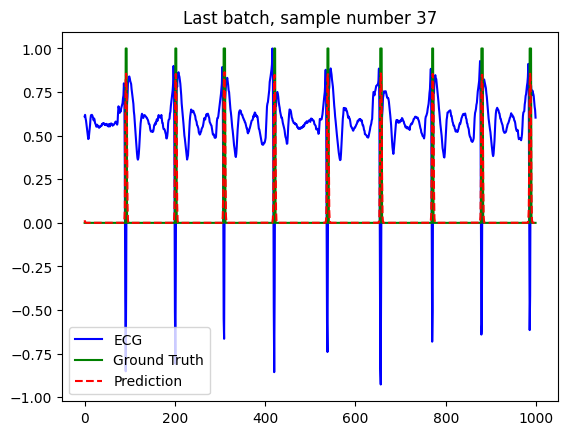

100%|██████████| 60/60 [00:02<00:00, 24.01it/s]



Train Loss: 0.0430
Train Weighted Accuracy: 0.88668
Train F1 Score: 0.79516
Train TPR: 0.78189
Train FPR: 0.00853
Train TNR: 0.99147
Train FNR: 0.21811



100%|██████████| 10/10 [00:00<00:00, 24.87it/s]



Validation Loss: 0.0415
Validation Weighted Accuracy: 0.90280
Validation F1 Score: 0.80102
Validation TPR: 0.81554
Validation FPR: 0.00995
Validation TNR: 0.99005
Validation FNR: 0.18446

====Epoch [13/20]====


 95%|█████████▌| 57/60 [00:02<00:00, 25.00it/s]

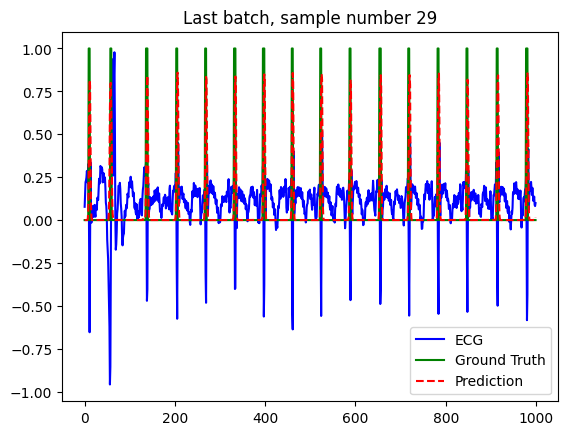

100%|██████████| 60/60 [00:02<00:00, 23.28it/s]



Train Loss: 0.0412
Train Weighted Accuracy: 0.89463
Train F1 Score: 0.80669
Train TPR: 0.79757
Train FPR: 0.00831
Train TNR: 0.99169
Train FNR: 0.20243



100%|██████████| 10/10 [00:00<00:00, 25.43it/s]



Validation Loss: 0.0400
Validation Weighted Accuracy: 0.90574
Validation F1 Score: 0.81089
Validation TPR: 0.82064
Validation FPR: 0.00917
Validation TNR: 0.99083
Validation FNR: 0.17936

====Epoch [14/20]====


 97%|█████████▋| 58/60 [00:02<00:00, 29.43it/s]

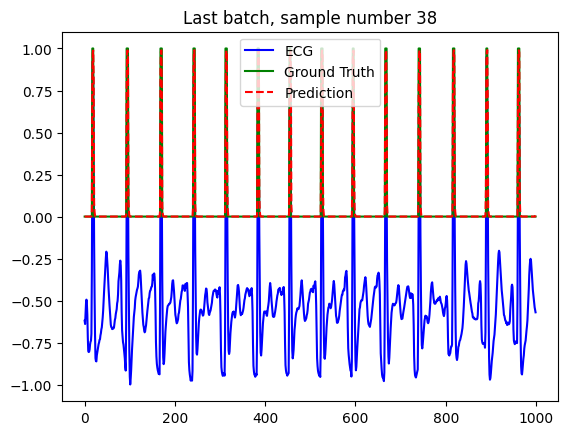

100%|██████████| 60/60 [00:02<00:00, 25.02it/s]



Train Loss: 0.0401


KeyboardInterrupt: 

In [6]:
model.train_model(x_train=x_train, y_train=y_train, epochs=EPOCHS, x_val=x_val, y_val=y_val, batch_size=BATCH_SIZE)

  0%|          | 0/300 [00:00<?, ?it/s]

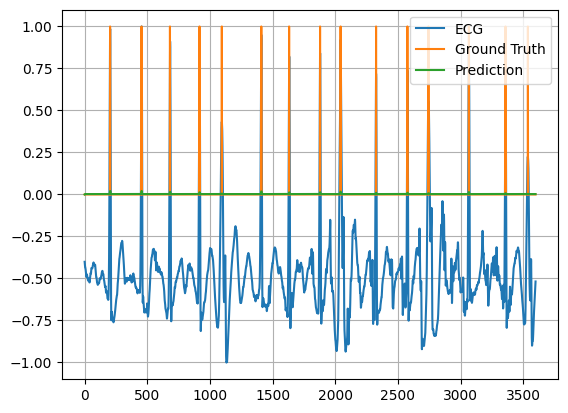

  7%|▋         | 22/300 [00:00<00:05, 48.47it/s]

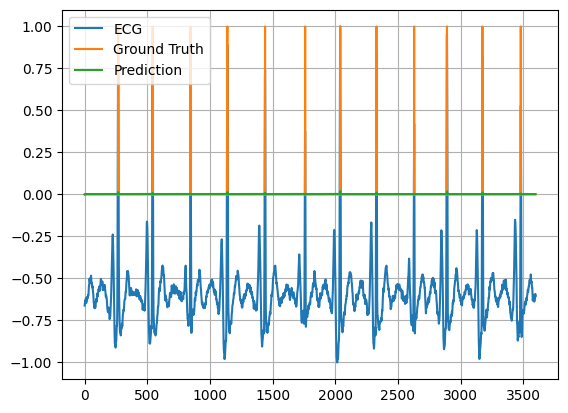

 20%|█▉        | 59/300 [00:01<00:03, 71.48it/s]

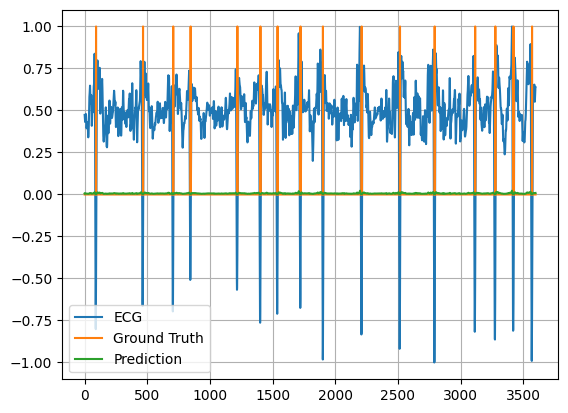

 29%|██▉       | 87/300 [00:01<00:03, 70.98it/s]

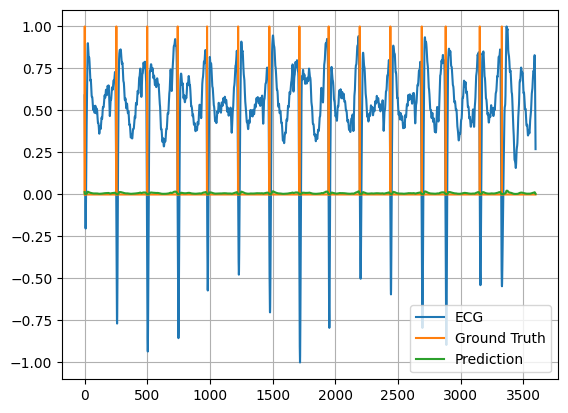

 39%|███▊      | 116/300 [00:02<00:02, 70.58it/s]

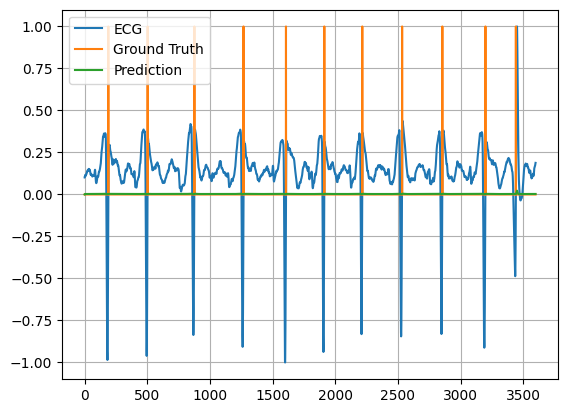

 48%|████▊     | 144/300 [00:02<00:02, 67.58it/s]

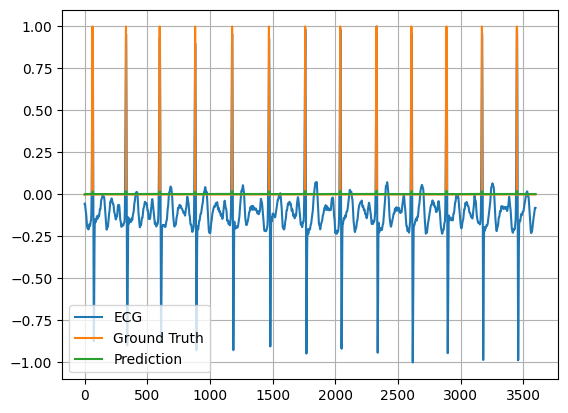

 59%|█████▊    | 176/300 [00:03<00:01, 65.71it/s]

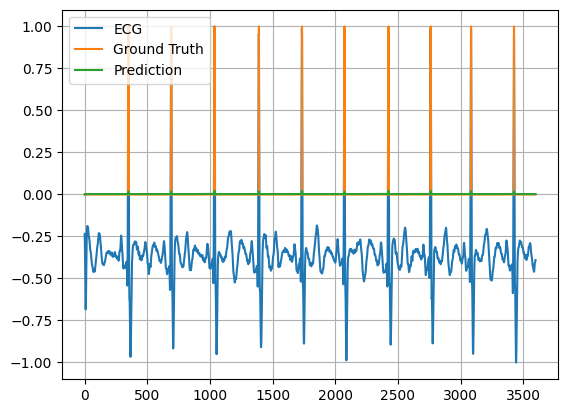

 70%|██████▉   | 209/300 [00:03<00:01, 66.54it/s]

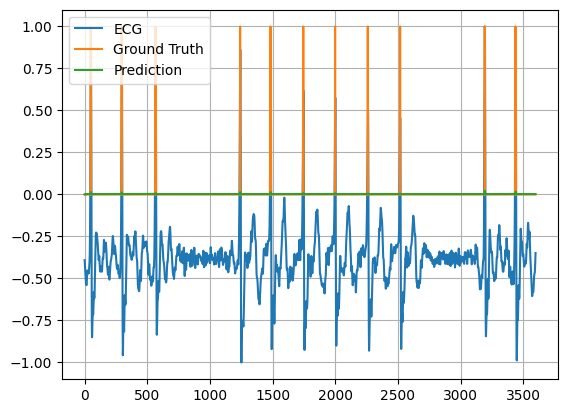

 78%|███████▊  | 233/300 [00:04<00:01, 60.98it/s]

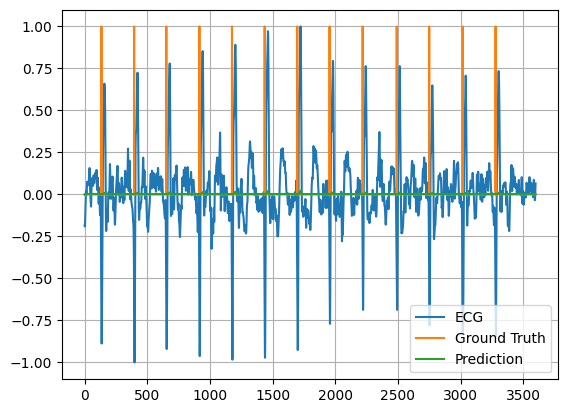

 89%|████████▉ | 267/300 [00:04<00:00, 65.19it/s]

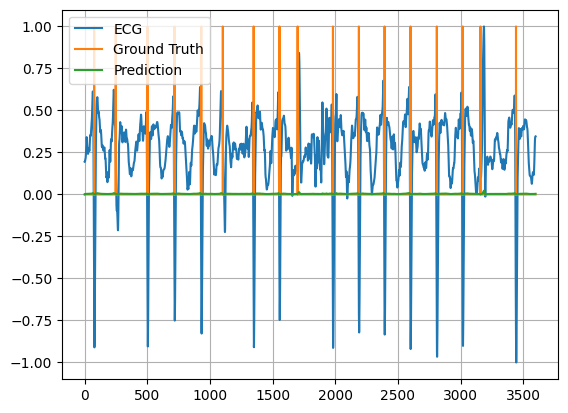

100%|██████████| 300/300 [00:05<00:00, 56.67it/s]



Test Loss: 0.0217
Test Accuracy: 0.00000000 %
Test F1 Score: 0.00000000
Test TPR: 0.00000000
Test FPR: 0.00000000



In [9]:
model.test_model(x_test=x_test, y_test=y_test, plot=True)

### Testing with own ECG recording

In [ ]:
my_test = np.load("E:\\ml-data\\masters-thesis\\myDataset\\Patryk\\07-05-24_16_56.npy")

In [ ]:
ECGs = split_signal(signal=my_test, fs=250, overlap_factor=0.25, window_in_seconds=10)

In [ ]:
my_X = []
my_Y = []

for ECG in ECGs:
  ECG = norm_min_max(signal=ECG, lower=-1, upper=1)
  ECG = nk.ecg_clean(ecg_signal=ECG, sampling_rate=250)
  my_X.append(ECG)
  
  _, r_peaks = nk.ecg_peaks(ecg_cleaned=ECG, sampling_rate=250)
  r_peaks = r_peaks["ECG_R_Peaks"]
  y = np.zeros_like(ECG)
  y[r_peaks] = 1

  my_Y.append(y)

my_Y = np.array(my_Y)
my_X = np.array(my_X)
my_X = np.expand_dims(my_X, 2)
my_Y = np.expand_dims(my_Y, 2)

In [ ]:
model.test_model(x_test=my_X, y_test=my_Y)

### Downsampling own ECG from 250 Hz to 100 Hz

In [ ]:
from scipy.signal import resample

In [ ]:
ecg_data = my_X[0]
downsampled_ecg_data = resample(ecg_data, 1000)

In [ ]:
plt.figure(figsize=(5,15))
plt.subplot(4,1,1)
plt.plot(ecg_data, 'b-')
plt.title("Original")
plt.grid()
plt.subplot(4,1,2)
plt.plot(downsampled_ecg_data, 'g-')
plt.title("Downsamples")
plt.grid()
plt.show()

In [ ]:
my_X = []
my_Y = []

for ECG in ECGs:
  ECG = norm_min_max(signal=ECG, lower=-1, upper=1)
  ECG = nk.ecg_clean(ecg_signal=ECG, sampling_rate=250)
  ECG = resample(ECG, 1000)
  my_X.append(ECG)
  
  _, r_peaks = nk.ecg_peaks(ecg_cleaned=ECG, sampling_rate=100)
  r_peaks = r_peaks["ECG_R_Peaks"]
  y = np.zeros_like(ECG)
  y[r_peaks] = 1

  my_Y.append(y)

my_Y = np.array(my_Y)
my_X = np.array(my_X)
my_X = np.expand_dims(my_X, 2)
my_Y = np.expand_dims(my_Y, 2)

In [ ]:
model.test_model(x_test=my_X, y_test=my_Y)

### Result of downsampling from 250 Hz to 100 Hz
As the result of downsampling from 250 Hz to 100 Hz, the test loss function of the model is lower than the test loss function before the downsampling.

### Load additional dataset - PTB-XL

In [75]:
data = load_ptbxl(path="E:\\ml-data\\masters-thesis\\ptb-xl-v2\\WFDB", sampling_rate=100)
data = np.array(data)
data = np.expand_dims(data, 2)
data = torch.Tensor(data)
data = data.to(device)

100%|██████████| 5/5 [00:00<00:00, 333.38it/s]


In [76]:
results = model(data)

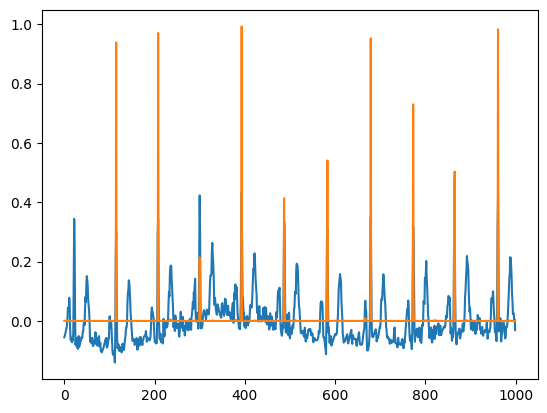

In [77]:
plt.plot(data[0].cpu())
plt.plot(results[0].cpu().detach().numpy())